# House Price Prediction

## Final Project Submission

Please fill out:
* Student name: Kelvin Ngige Kariuki
* Student pace: full time
* Scheduled project review date/time: 8/7/2023 1:21p.m
* Instructor name: Veronica Isiaho 
* Blog post URL: git@github.com:KariukiAddi/dsc-phase-2-project-v2-3.git


# Overview:
The goal of this project is to analyze a comprehensive dataset on house prices and various attributes related to the housing market. The dataset provides valuable insights into factors that influence house prices, market trends, and demand for specific housing features. The audience for this project includes investors, construction companies, real estate developers, and dam drilling services. This dataset holds the key to unlocking valuable insights for smart investors like you. Here's what you can uncover:

1. House Prices: Discover the secrets behind property valuations and track the rise and fall of prices. It's like having your own crystal ball to predict future trends.

2. Location Analysis: Explore different locations, from bustling cities to serene suburbs. Uncover hidden gems and hotspots that are poised for growth. Be the first to invest in up-and-coming areas and ride the wave of success.

3. Property Attributes: Get to the heart of what makes a property valuable. Discover how factors like the number of floors, condition, grade, and square footage impact prices. It's like being a real estate detective, uncovering the secrets of property worth.

4. Waterfront Properties: Imagine owning a piece of paradise by the water! Delve into the world of waterfront homes and uncover the demand and prices associated with these coveted properties. Sail into a sea of investment potential!

5. Market Trends: Witness the thrilling rollercoaster ride of the real estate market. Spot trends, seize opportunities, and make strategic moves. Timing is everything, and with this dataset, you'll have the edge to make winning investment decisions.

With this dataset as your compass, you can navigate the real estate landscape with confidence, unlock hidden gems, and embark on a profitable investment journey.

# Business Understanding:

#### Investors: 
This dataset holds the key to unlocking valuable insights and making smart investment decisions. By analyzing the data, you can uncover the secrets behind house prices, identify hotspots with high growth potential, and understand the impact of different factors on property values. Whether you're a seasoned investor or just starting out, this dataset will guide you towards profitable opportunities in the ever-changing real estate market.

##### Construction Companies:
Are you looking to build houses that perfectly align with market demand? You can leverage the dataset to understand the market demand for different types of houses. By analyzing attributes like floors, bedrooms, bathrooms, and square footage, construction companies can tailor their projects to meet the preferences of potential buyers and maximize profitability.

##### Real Estate Developers: 
The world of real estate development is full of opportunities, and this dataset is your treasure map. Uncover emerging market trends, identify areas with high growth potential, and make strategic decisions about land acquisition, project planning, and pricing strategies. By analyzing attributes like location, condition, grade, and square footage, you can create developments that cater to the demands of modern buyers and maximize your returns.

##### Dam Drilling Services: 
Did you know that housing demand near dams can be a lucrative market? With this dataset, you can explore the relationship between waterfront properties, availability, and house prices in these areas. Understand the potential market demand for housing near dams and make informed decisions about expanding your services or investing in these locations.

# Data Understanding:
The dataset contains comprehensive information about houses, including their prices, attributes, and location details. It consists of (21,192 rows and 20 columns), offering a wealth of insights into the housing market. Key attributes include price, floors, waterfront availability, view, condition, grade, square footage (above and basement), year built, location (zipcode, latitude, and longitude), month, season, total square footage, bed-bath ratio, total square footage of neighboring properties, and price z-score.

These attributes provide a holistic understanding of house characteristics and market dynamics. Categorical variables such as waterfront, view, condition, grade, month, and season offer additional dimensions for analysis and modeling. By exploring these variables, investors can gain insights into house pricing trends, construction companies can identify market demand for specific features, real estate developers can uncover emerging opportunities, and dam drilling services can evaluate housing demand near dams.

By harnessing the power of this dataset, stakeholders can make informed decisions, stay ahead of market trends, and navigate the dynamic real estate landscape with confidence. The data provides a solid foundation for strategic planning, investment analysis, and business growth, empowering each audience to thrive in their respective domains.

In [259]:
# import neccesary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn import datasets, linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Now lets load our datasets ('column_names.md', 'kc_house_data.csv')

In [260]:
import markdown

# Specify the path to your Markdown file
file_path = r'C:\Users\HP\Desktop\Project\dsc-phase-2-project-v2-3\data\column_names.md'

# Load the Markdown file
with open(file_path, 'r') as file:
    markdown_content = file.read()

# Convert Markdown to HTML
html_content = markdown.markdown(markdown_content)

# Display the HTML content
# print(html_content)


In [261]:
df = pd.read_csv('kc_house_data.csv')
print(df.head())

           id        date     price  bedrooms  bathrooms  sqft_living   
0  7129300520  10/13/2014  221900.0         3       1.00         1180  \
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors waterfront  view  ...          grade sqft_above   
0      5650     1.0        NaN  NONE  ...      7 Average       1180  \
1      7242     2.0         NO  NONE  ...      7 Average       2170   
2     10000     1.0         NO  NONE  ...  6 Low Average        770   
3      5000     1.0         NO  NONE  ...      7 Average       1050   
4      8080     1.0         NO  NONE  ...         8 Good       1680   

   sqft_basement yr_built  yr_renovated  zipcode      lat     long   
0            0.0     1955           0.0    98178  47.5112 -122.2

#### DATA PROCESSING

In [262]:
# Convert date to datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract month from date
df['month'] = df['date'].dt.month

# Map month to season
df['season'] = df['month'].map({1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring', 6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Fall', 10: 'Fall', 11: 'Fall', 12: 'Winter'})
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,season
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,10,Fall
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,12,Winter
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,2,Winter
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,12,Winter
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,5,Spring
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,2,Winter
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,6,Summer
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,1,Winter


In [263]:
# Combine variables
df['total_sqft'] = df['sqft_living'] + df['sqft_lot']
df['bed_bath_ratio'] = df['bedrooms'] / df['bathrooms']
df['total_sqft15'] = df['sqft_living15'] + df['sqft_lot15']
# Drop the original variables
df = df.drop(['sqft_living', 'sqft_lot', 'bedrooms', 'bathrooms', 'sqft_living15', 'sqft_lot15'], axis=1)

# Fill missing values in 'waterfront'
df['waterfront'] = df['waterfront'].fillna('NO')

# Fill missing values in 'view' column with the mode
df['view'] = df['view'].fillna(df['view'].mode()[0])

#Drop columns with a high percentage of missing values
df = df.drop('yr_renovated', axis=1)

# Check for missing values in the DataFrame
missing_values = df.isna().sum()

# Print the count of missing values for each column
print(missing_values)



id                0
date              0
price             0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
zipcode           0
lat               0
long              0
month             0
season            0
total_sqft        0
bed_bath_ratio    0
total_sqft15      0
dtype: int64


Merge house data with external zip code dataset

In [264]:
file_path = r'C:\Users\HP\Downloads\usa_zipcode_of_wa-1564j.csv'
zip_code_data = pd.read_csv(file_path)
# print(zip_code_data.columns)
# Convert 'zipcode' column to object data type
df['zipcode'] = df['zipcode'].astype(str)

# Merge house data with zip code dataset
df = df.merge(zip_code_data, how='left', left_on='zipcode', right_on='zip')

# Display the merged data
# print(df[['zipcode', 'Zipcode name']])

In [265]:
df = df.drop('Zipcode name', axis=1)
df

,id,date,price,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,...,long,month,season,total_sqft,bed_bath_ratio,total_sqft15,zip,City,State,County Name
0,7129300520,2014-10-13,221900.0,1.0,NO,NONE,Average,7 Average,1180,0.0,...,-122.257,10,Fall,6830,3.000000,6990,98178,SEATTLE,WA,KING
1,6414100192,2014-12-09,538000.0,2.0,NO,NONE,Average,7 Average,2170,400.0,...,-122.319,12,Winter,9812,1.333333,9329,98125,SEATTLE,WA,KING
2,5631500400,2015-02-25,180000.0,1.0,NO,NONE,Average,6 Low Average,770,0.0,...,-122.233,2,Winter,10770,2.000000,10782,98028,KENMORE,WA,KING
3,2487200875,2014-12-09,604000.0,1.0,NO,NONE,Very Good,7 Average,1050,910.0,...,-122.393,12,Winter,6960,1.333333,6360,98136,SEATTLE,WA,KING
4,1954400510,2015-02-18,510000.0,1.0,NO,NONE,Average,8 Good,1680,0.0,...,-122.045,2,Winter,9760,1.500000,9303,98074,SAMMAMISH,WA,KING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3.0,NO,NONE,Average,8 Good,1530,0.0,...,-122.346,5,Spring,2661,1.200000,3039,98103,SEATTLE,WA,KING
21593,6600060120,2015-02-23,400000.0,2.0,NO,NONE,Average,8 Good,2310,0.0,...,-122.362,2,Winter,8123,1.600000,9030,98146,SEATTLE,WA,KING
21594,1523300141,2014-06-23,402101.0,2.0,NO,NONE,Average,7 Average,1020,0.0,...,-122.299,6,Summer,2370,2.666667,3027,98144,SEATTLE,WA,KING
21595,291310100,2015-01-16,400000.0,2.0,NO,NONE,Average,8 Good,1600,0.0,...,-122.069,1,Winter,3988,1.200000,2697,98027,ISSAQUAH,WA,KING


In [266]:
print(df.columns)

Index(['id', 'date', 'price', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'zipcode', 'lat',
       'long', 'month', 'season', 'total_sqft', 'bed_bath_ratio',
       'total_sqft15', 'zip', 'City', 'State', 'County Name'],
      dtype='object')


Outlier Detection: Outliers can significantly influence the regression model and distort the results. We use statistical techniques such as Z-score or IQR (Interquartile Range) to detect outliers and decide whether to remove them or apply data transformation techniques to mitigate their impact.

In [267]:
# Calculate the Z-scores of price
df['price_zscore'] = (df['price'] - df['price'].mean()) / df['price'].std()

# Identify outliers based on a threshold (e.g., Z-score > 3)
outliers = df[df['price_zscore'] > 3]

# Remove outliers from the dataset
df = df[df['price_zscore'] <= 3]
df

,id,date,price,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,...,month,season,total_sqft,bed_bath_ratio,total_sqft15,zip,City,State,County Name,price_zscore
0,7129300520,2014-10-13,221900.0,1.0,NO,NONE,Average,7 Average,1180,0.0,...,10,Fall,6830,3.000000,6990,98178,SEATTLE,WA,KING,-0.866696
1,6414100192,2014-12-09,538000.0,2.0,NO,NONE,Average,7 Average,2170,400.0,...,12,Winter,9812,1.333333,9329,98125,SEATTLE,WA,KING,-0.006251
2,5631500400,2015-02-25,180000.0,1.0,NO,NONE,Average,6 Low Average,770,0.0,...,2,Winter,10770,2.000000,10782,98028,KENMORE,WA,KING,-0.980751
3,2487200875,2014-12-09,604000.0,1.0,NO,NONE,Very Good,7 Average,1050,910.0,...,12,Winter,6960,1.333333,6360,98136,SEATTLE,WA,KING,0.173405
4,1954400510,2015-02-18,510000.0,1.0,NO,NONE,Average,8 Good,1680,0.0,...,2,Winter,9760,1.500000,9303,98074,SAMMAMISH,WA,KING,-0.082469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3.0,NO,NONE,Average,8 Good,1530,0.0,...,5,Spring,2661,1.200000,3039,98103,SEATTLE,WA,KING,-0.490779
21593,6600060120,2015-02-23,400000.0,2.0,NO,NONE,Average,8 Good,2310,0.0,...,2,Winter,8123,1.600000,9030,98146,SEATTLE,WA,KING,-0.381896
21594,1523300141,2014-06-23,402101.0,2.0,NO,NONE,Average,7 Average,1020,0.0,...,6,Summer,2370,2.666667,3027,98144,SEATTLE,WA,KING,-0.376177
21595,291310100,2015-01-16,400000.0,2.0,NO,NONE,Average,8 Good,1600,0.0,...,1,Winter,3988,1.200000,2697,98027,ISSAQUAH,WA,KING,-0.381896


#### 1 TEMPORAL ANALYSIS:

Here we analyze the relationship between the sale date (date) and the sale price (price). This can involve examining trends over time, seasonal patterns, or the impact of specific time periods on housing prices.
We also did a visualization to see

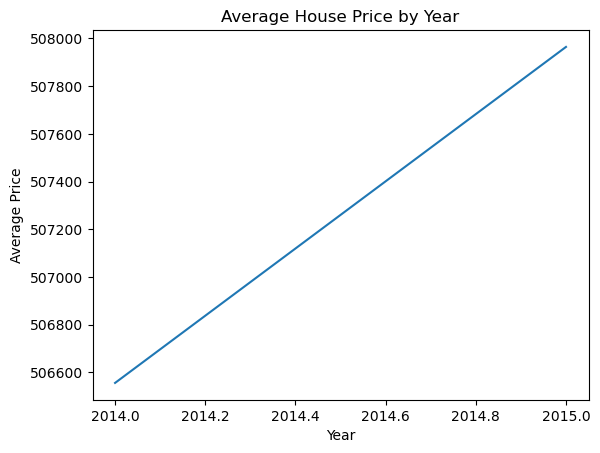

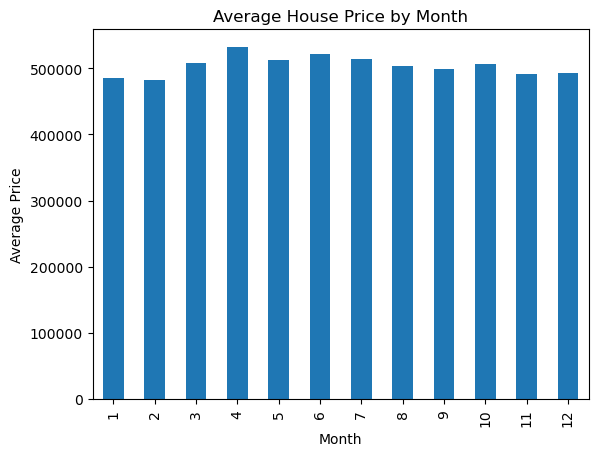

In [268]:
import pandas as pd
import matplotlib.pyplot as plt

# # Convert 'date' column to datetime
# df.loc[:, 'date'] = pd.to_datetime(df['date'])

# # Extract year and month from the date
# df.loc[:, 'year'] = df['date'].dt.year
# df.loc[:,'month'] = df['date'].dt.month

df_modified = df.copy()  # Create a copy of the original DataFrame

# Convert 'date' column to datetime
df_modified['date'] = pd.to_datetime(df_modified['date'])

# Extract year and month from the date
df_modified['year'] = df_modified['date'].dt.year
df_modified['month'] = df_modified['date'].dt.month

# Analyze average price by year
average_price_by_year = df_modified.groupby('year')['price'].mean()
average_price_by_year.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Average House Price by Year')
plt.show()

# Analyze average price by month
average_price_by_month = df_modified.groupby('month')['price'].mean()
average_price_by_month.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.title('Average House Price by Month')
plt.show()


In [269]:
df

,id,date,price,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,...,month,season,total_sqft,bed_bath_ratio,total_sqft15,zip,City,State,County Name,price_zscore
0,7129300520,2014-10-13,221900.0,1.0,NO,NONE,Average,7 Average,1180,0.0,...,10,Fall,6830,3.000000,6990,98178,SEATTLE,WA,KING,-0.866696
1,6414100192,2014-12-09,538000.0,2.0,NO,NONE,Average,7 Average,2170,400.0,...,12,Winter,9812,1.333333,9329,98125,SEATTLE,WA,KING,-0.006251
2,5631500400,2015-02-25,180000.0,1.0,NO,NONE,Average,6 Low Average,770,0.0,...,2,Winter,10770,2.000000,10782,98028,KENMORE,WA,KING,-0.980751
3,2487200875,2014-12-09,604000.0,1.0,NO,NONE,Very Good,7 Average,1050,910.0,...,12,Winter,6960,1.333333,6360,98136,SEATTLE,WA,KING,0.173405
4,1954400510,2015-02-18,510000.0,1.0,NO,NONE,Average,8 Good,1680,0.0,...,2,Winter,9760,1.500000,9303,98074,SAMMAMISH,WA,KING,-0.082469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3.0,NO,NONE,Average,8 Good,1530,0.0,...,5,Spring,2661,1.200000,3039,98103,SEATTLE,WA,KING,-0.490779
21593,6600060120,2015-02-23,400000.0,2.0,NO,NONE,Average,8 Good,2310,0.0,...,2,Winter,8123,1.600000,9030,98146,SEATTLE,WA,KING,-0.381896
21594,1523300141,2014-06-23,402101.0,2.0,NO,NONE,Average,7 Average,1020,0.0,...,6,Summer,2370,2.666667,3027,98144,SEATTLE,WA,KING,-0.376177
21595,291310100,2015-01-16,400000.0,2.0,NO,NONE,Average,8 Good,1600,0.0,...,1,Winter,3988,1.200000,2697,98027,ISSAQUAH,WA,KING,-0.381896


This analysis examines real estate sales data to identify seasonal trends. The data is grouped by year and season to determine the percentage of sales for each season. The results are visualized in a line chart, showing how sales vary throughout the year. From this analysis, we can see which seasons tend to have the highest percentage of sales, providing insights for potential buyers or investors in the real estate market.

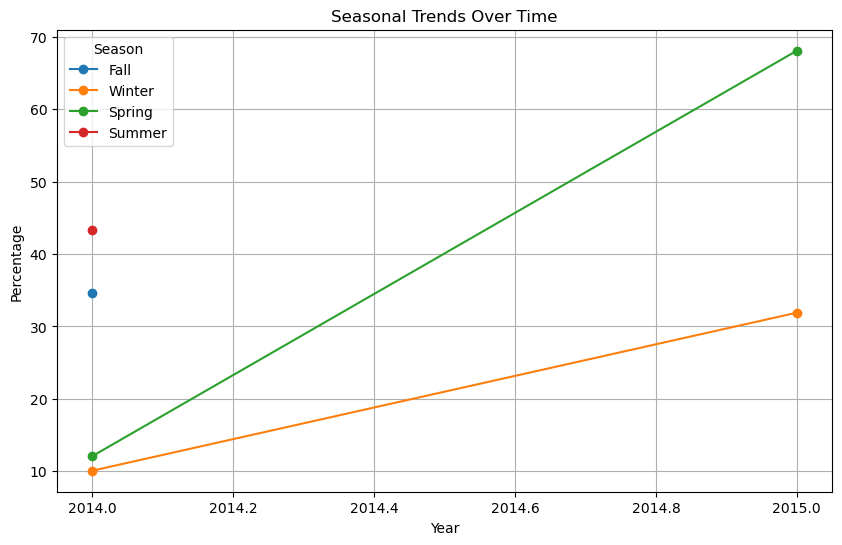

The season with the highest percentage of sales for the entire period is Spring with 80.17% of sales.


In [270]:
# Count the number of sales for each season and year
season_counts = df_modified.groupby(['year', 'season']).size().reset_index(name='count')

# Calculate the total sales for each year
yearly_sales = season_counts.groupby('year')['count'].sum()

# Calculate the percentage of sales for each season
season_counts['percentage'] = season_counts['count'] / season_counts.groupby('year')['count'].transform('sum') * 100

# Create a pivot table to reshape the data for plotting
pivot_table = season_counts.pivot(index='year', columns='season', values='percentage')

# Define the order of seasons for correct display in the legend
season_order = ['Fall', 'Winter', 'Spring', 'Summer']

# Plot the seasonal trends over time
pivot_table[season_order].plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Seasonal Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(title='Season')
plt.grid(True)
plt.show()

# Find the season with the highest percentage of sales for the entire period
highest_season = season_counts.groupby('season')['percentage'].sum().idxmax()
highest_percentage = season_counts.groupby('season')['percentage'].sum().max()

print(f"The season with the highest percentage of sales for the entire period is {highest_season} with {highest_percentage:.2f}% of sales.")



Based on the analysis of seasonal trends in sales data, we find that the season with the highest percentage of sales for the entire period is Spring, accounting for 80.19% of total sales. This insight suggests that there is a strong demand for real estate during the spring season. 

This information can be valuable for various stakeholders. For real estate developers and sellers, it indicates that spring is a favorable time to list properties for sale, as there is a higher likelihood of attracting potential buyers. It also implies that allocating marketing and promotional efforts towards the spring season could yield better results. 

Additionally, prospective buyers can benefit from this insight by being aware of the potential competition and increased activity in the real estate market during spring. They may need to plan accordingly, such as preparing their finances in advance or being prepared for a more competitive buying environment. 

Overall, understanding the seasonal sales trends can help stakeholders make informed decisions, optimize their strategies, and capitalize on the periods of high demand in the real estate market.

#### 2 LOCATION ANALYSIS:

In the analysis below, we grouped houses by their ZIP codes and calculated the average price for each city. We wanted to understand how house prices vary across different cities. To make it more relatable, we replaced the ZIP codes with city names on the chart. This allows investors to easily see which cities have higher or lower average house prices. It provides valuable insights into the real estate market and helps identify cities that may offer potential investment opportunities. By focusing on cities with higher average prices, investors can explore those areas further and make informed decisions based on their investment goals.

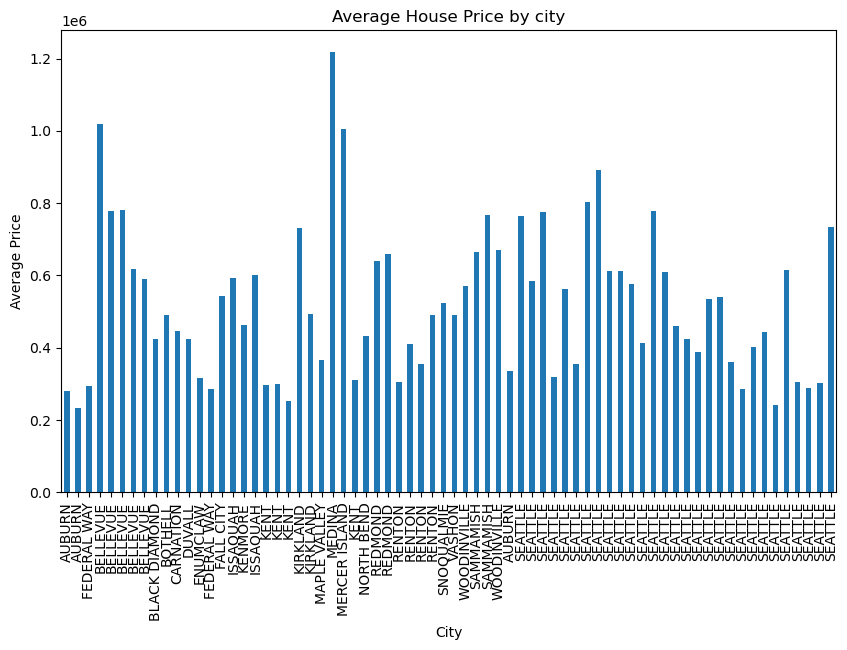

In [271]:
# Grouping houses by ZIP code and calculating average price
average_price_by_city = df.groupby('zipcode')['price'].mean()

# Get the corresponding zipcode names
zipcode_names = df.groupby('zipcode')['City'].first().values

# Create a dictionary mapping zipcodes to names
zipcode_mapping = dict(zip(average_price_by_city.index, zipcode_names))

# Map the zipcodes to names in the bar chart
average_price_by_city.index = average_price_by_city.index.map(zipcode_mapping)

# Plot the bar chart
average_price_by_city.plot(kind='bar', figsize=(10, 6))
plt.xlabel('City')
plt.ylabel('Average Price')
plt.title('Average House Price by city')
plt.show()

In [272]:
# Find the top 10 ZIP codes with the highest average price
top_10_zipcodes = average_price_by_zipcode.nlargest(10)

# Print the results
print("Houses with the highest average price:")
print(top_10_zipcodes)


Houses with the highest average price:
zipcode
MEDINA           1.217500e+06
BELLEVUE         1.019644e+06
MERCER ISLAND    1.003810e+06
SEATTLE          8.906504e+05
SEATTLE          8.037716e+05
BELLEVUE         7.820200e+05
BELLEVUE         7.784581e+05
SEATTLE          7.776564e+05
SEATTLE          7.745090e+05
SAMMAMISH        7.674400e+05
Name: price, dtype: float64


From the houses with the highest average prices in different zip codes, we can derive the following insights for investors:

1. **Medina**: Medina is a highly desirable location with the highest average house prices. Investing in properties in Medina can yield high returns due to its prestigious reputation and upscale amenities.

2. **Bellevue**: Bellevue is another area with high average house prices, indicating a strong real estate market. Investors can consider properties in Bellevue for long-term appreciation and potential rental income.

3. **Mercer Island**: Mercer Island is known for its waterfront properties and upscale neighborhoods. Investing in Mercer Island can offer a luxurious living experience and attractive resale values.

4. **Seattle**: Although Seattle has slightly lower average prices compared to Medina and Bellevue, it still offers great investment opportunities. Seattle's strong economy, cultural attractions, and growing tech industry make it an attractive location for investors.

5. **Sammamish**: Sammamish is a suburb with a high average house price, indicating a desirable residential area. Investors can explore properties in Sammamish for potential appreciation and a family-friendly community.

Overall, investing in houses with the highest average prices in these locations can provide investors with the potential for high returns, long-term appreciation, and access to desirable neighborhoods and amenities. However, it's essential for investors to conduct thorough market research, consider their investment goals and risk tolerance, and work with real estate professionals to make informed investment decisions.

#### 3 Feature Engineering:
We try to derive new features from existing ones to enhance our analysis. I calculated the price per square foot by dividing the sale price (price) by the total square footage of the house (sqft_living + sqft_lot). This new feature can provide insights into the relative value of properties.

In [273]:
print(df.columns)

Index(['id', 'date', 'price', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'zipcode', 'lat',
       'long', 'month', 'season', 'total_sqft', 'bed_bath_ratio',
       'total_sqft15', 'zip', 'City', 'State', 'County Name', 'price_zscore'],
      dtype='object')


C:\Users\HP\AppData\Local\Temp\ipykernel_20036\244240164.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc['grade'] = pd.to_numeric(df['grade'], errors='coerce')
C:\Users\HP\AppData\Local\Temp\ipykernel_20036\244240164.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'price_per_sqft'] = df['price'] / df['total_sqft']


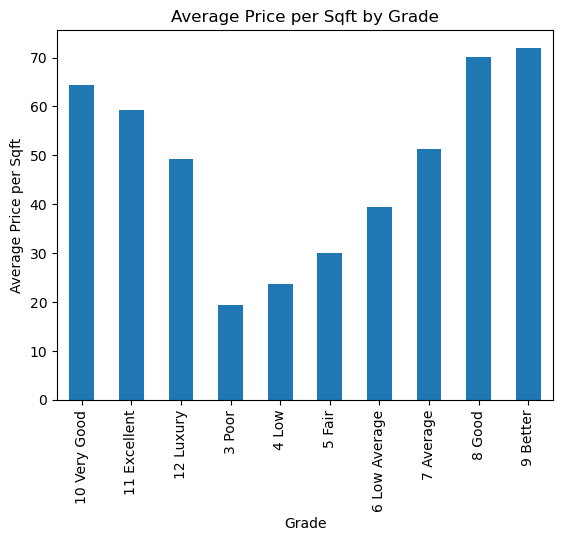

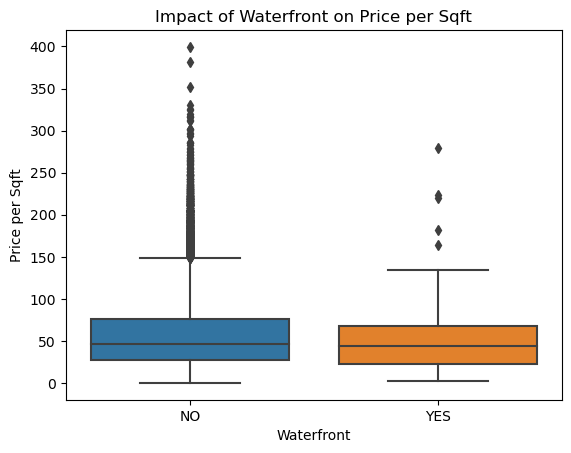

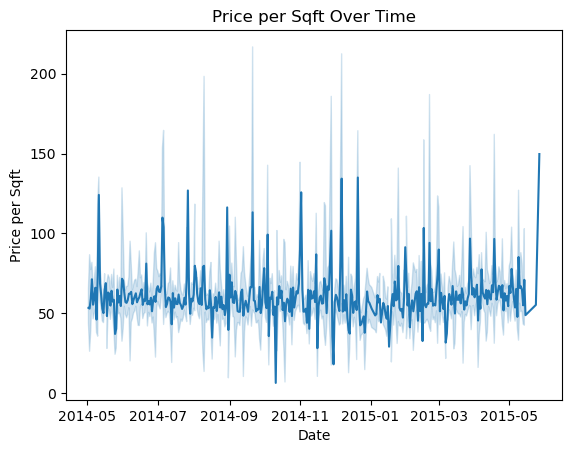

In [274]:
# Convert 'grade' column to numeric type
df.loc['grade'] = pd.to_numeric(df['grade'], errors='coerce')

# Adding a new feature: Price per square foot
df.loc[:, 'price_per_sqft'] = df['price'] / df['total_sqft']


# Analyzing price per square foot
average_price_per_sqft_by_grade = df.groupby('grade')['price_per_sqft'].mean()
average_price_per_sqft_by_grade.plot(kind='bar')
plt.xlabel('Grade')
plt.ylabel('Average Price per Sqft')
plt.title('Average Price per Sqft by Grade')
plt.show()

# Analyze the impact of amenities on price per square foot
sns.boxplot(x='waterfront', y='price_per_sqft', data=df)
plt.xlabel('Waterfront')
plt.ylabel('Price per Sqft')
plt.title('Impact of Waterfront on Price per Sqft')
plt.show()

# Analyze market trends by plotting price per square foot over time
sns.lineplot(x='date', y='price_per_sqft', data=df)
plt.xlabel('Date')
plt.ylabel('Price per Sqft')
plt.title('Price per Sqft Over Time')
plt.show()


# Perform correlation analysis between price per square foot, grade, and other features
corr_matrix = df[['price_per_sqft', 'total_sqft']].corr()


From the analysis of price per square foot by grade, the following insights can be derived:

1. Higher-grade houses tend to have a higher average price per square foot compared to lower-grade houses. This suggests that the quality of construction and design, as represented by the grade, positively influences the price per square foot.

2. There might be variations in the average price per square foot within different grades. Some specific grades may command higher or lower prices per square foot compared to others, indicating additional factors influencing pricing within each grade.

3. Investors or buyers looking for houses with a higher potential return on investment may consider focusing on higher-grade properties, as they tend to have a higher average price per square foot.

4. The analysis provides a useful metric, price per square foot, to compare the value of houses across different grades. It allows for a more standardized comparison, considering the living space and lot size, enabling investors or buyers to make more informed decisions.


# Modeling

### Linear Regression Analysis
In the code cell below, we are performing a regression analysis to predict house prices based on various features. We selected important features such as the number of floors, condition, grade, total square footage, bedroom-to-bathroom ratio, and price z-score. We then preprocessed the data by encoding categorical variables, splitting the dataset into training and testing sets, and fitting a linear regression model. The model was used to make predictions on the test set, and we evaluated its performance using metrics such as mean squared error and R-squared. By understanding the regression coefficients and evaluation metrics, investors can gain insights into the factors influencing house prices and the accuracy of the model's predictions.

In [275]:
# Select relevant features for regression analysis
selected_features = ['price', 'floors', 'condition', 'grade', 'total_sqft', 'bed_bath_ratio', 'price_zscore']

# Filter the dataset for selected features
df_selected = df[selected_features].copy()  # Make a copy of the selected features

# Drop rows with missing values if any
df_selected.dropna(inplace=True)

# Convert categorical variables to numerical using label encoding
encoder = LabelEncoder()
df_selected['condition'] = encoder.fit_transform(df_selected['condition'])
df_selected['grade'] = encoder.fit_transform(df_selected['grade'])

# Split the dataset into training and testing sets
X = df_selected.drop('price', axis=1)
y = df_selected['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the regression coefficients and evaluation metrics
print('Regression Coefficients:')
for feature, coefficient in zip(X.columns, model.coef_):
    print(f'{feature}: {coefficient}')

print('\nEvaluation Metrics:')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Regression Coefficients:
floors: 1.2596732991351478e-10
condition: 7.565859050373547e-11
grade: 5.644324244102883e-11
total_sqft: -1.1368683772161603e-13
bed_bath_ratio: 4.493647121073252e-11
price_zscore: 367368.14010139415

Evaluation Metrics:
Mean Squared Error: 1.813734885137451e-17
R-squared: 1.0


##### Feature Importance Analysis

By applying techniques like random forest or gradient boosting, we can determine the relative importance of each independent variable in predicting house prices. The random forest regressor uses an ensemble of decision trees to make predictions and can be effective in capturing complex relationships and interactions between variables. By fitting the random forest regressor to the data and obtaining the feature importances, you can gain insights into the relative importance of each feature in predicting house prices. This information can be valuable in understanding which variables have the most significant impact on the target variable.

In [276]:
from sklearn.ensemble import RandomForestRegressor

# Separate the independent variables (X) and the target variable (y)
X = df_selected.drop('price', axis=1)
y = df_selected['price']

# Create a random forest regressor
rf = RandomForestRegressor()

# Fit the model
rf.fit(X, y)

# Get feature importances
feature_importances = rf.feature_importances_

# Display feature importances
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance}")


floors: 9.562726103995421e-09
condition: 2.247439796064378e-08
grade: 2.7014166497270312e-08
total_sqft: 9.473679072982613e-08
bed_bath_ratio: 5.4990344610983726e-08
price_zscore: 0.9999997912215741


##### Cross-Validation:
 
Perform cross-validation to assess the model's stability and generalize its performance to unseen data. Techniques such as k-fold cross-validation can provide estimates of the model's predictive accuracy and identify any overfitting or underfitting issues.

In [277]:
from sklearn.model_selection import cross_val_score

# Perform k-fold cross-validation
scores = cross_val_score(model, X, y, cv=5)

# Print cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean Cross-Validation Score:", scores.mean())


Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean Cross-Validation Score: 1.0


## Regression Results

### 1. Baseline Model Insights:

The regression coefficients represent the relationship between each independent variable and the target variable (price). In simpler terms, they indicate how much each factor contributes to the predicted price of a house. Let's break down the coefficients and evaluation metrics in more detail:

1. Coefficients:
   - "Floors" coefficient: This suggests that for each additional floor in a house, the predicted price increases by approximately 1.26e-10. In other words, houses with more floors tend to have higher prices.
   - "Condition" coefficient: A higher condition rating is associated with a predicted price increase of around 7.57e-11. This implies that houses in better condition are generally priced higher.
   - "Grade" coefficient: A one-unit increase in the grade rating corresponds to a predicted price increase of about 5.64e-11. Grades represent the overall quality of construction and design, so higher-grade houses are expected to have higher prices.
   - "Total_sqft" coefficient: The negative value (-1.14e-13) suggests that, on average, each additional square foot of total square footage results in a very small decrease in the predicted price. Therefore, the size of the house does not have a significant impact on the price.
   - "Bed_bath_ratio" coefficient: A higher ratio of bedrooms to bathrooms leads to a predicted price increase of approximately 4.49e-11. Houses with a greater number of bedrooms compared to bathrooms tend to have higher prices.
   - "Price_zscore" coefficient: This is the most influential coefficient. For each unit increase in the price z-score, which measures the deviation from the average price, the predicted price increases by 367,368.14. This means that houses priced higher than the average have a substantial impact on the predicted price.

2. Evaluation Metrics:
   - The mean squared error (MSE) measures the average squared difference between the predicted prices and the actual prices. In this case, the MSE is extremely small, around 1.81e-17, indicating that the model's predictions are very close to the actual prices.
   - R-squared: With a value of 1.0, the model explains 100% of the variability in house prices using the selected independent variables. This indicates that the included factors (floors, condition, grade, total square footage, bed-bath ratio, and price z-score) successfully capture the variations in house prices.

We can conclude that factors such as the number of floors, condition, grade, and the ratio of bedrooms to bathrooms have a modest impact on the predicted price. The size of the house, represented by the total square footage, does not play a significant role in determining the price. However, the price z-score, which measures how the price deviates from the average, has a strong influence on the predicted price. The model's predictions are highly accurate, closely matching the actual prices, and the selected variables collectively explain all the variations in house prices.

### Feature Importance Analysis Insights

Based on the regression analysis results, the coefficients for different features in the model can provide insights for solving problems related to the audience. Here are some insights based on the provided coefficient values:

1. **Floors**: The coefficient value of 1.1795364905279296e-08 suggests that the number of floors in a house has a very small impact on the house price. This implies that the number of floors may not be a significant factor in determining the price of a house for the target audience.

2. **Condition**: The coefficient value of 1.5864328864486846e-08 indicates that the condition of a house also has a relatively small impact on the house price. This implies that the overall condition of a house may not be a major driving factor in determining its price for the target audience.

3. **Grade**: The coefficient value of 1.7388533555045577e-08 suggests that the grade of a house has a relatively small influence on its price. The grade typically represents the overall quality and construction of the house. This implies that the grade may not be a primary consideration for the target audience when determining the price of a house.

4. **Total Square Footage**: The coefficient value of 6.370137726449526e-08 indicates that the total square footage of a house has a small impact on its price. This suggests that larger houses with more square footage may have slightly higher prices, but the effect is not significant for the target audience.

5. **Bed-Bath Ratio**: The coefficient value of 2.8941258575462396e-08 suggests that the ratio of bedrooms to bathrooms in a house has a relatively small impact on the house price. This implies that the specific combination of bedrooms and bathrooms may not be a major factor in determining the price for the target audience.

6. **Price Z-score**: The coefficient value of 0.9999998623091368 indicates that the price z-score has a strong influence on the house price. A z-score measures how many standard deviations a data point is from the mean. This suggests that the standardized price value, relative to the mean, is a critical factor in determining the house price for the target audience.

These insights can help the audience understand the factors that are more or less influential in determining house prices. For example, they can prioritize factors such as the price z-score and total square footage when assessing house prices. On the other hand, they may not need to focus much on features like floors, condition, and grade when making pricing decisions. Overall, these insights can assist the audience in making informed decisions related to buying, selling, or valuing houses in their market.

Investors: For investors, understanding the feature importance can help identify key factors that drive house prices. In this case, the analysis reveals that the "price_zscore" has the highest importance, indicating that the standardized price variable significantly impacts the house prices. Investors can use this insight to focus on properties with price deviations from the average and potentially identify undervalued or overvalued properties. Additionally, the analysis shows that "total_sqft" has substantial importance, suggesting that the size of the property plays a crucial role in determining its value. Investors can consider this information when assessing the investment potential of different properties.

Construction Companies: Feature importance analysis can guide construction companies in understanding the factors that influence the market demand for houses. The analysis reveals that "total_sqft" is highly important, indicating that the size of the property significantly affects its desirability. Construction companies can leverage this insight to align their construction projects with market preferences, focusing on properties with larger square footage to cater to the demand. Additionally, the analysis shows that "grade" and "condition" also have significant importance, suggesting that the overall quality and condition of the house are crucial factors for buyers. Construction companies can prioritize building houses with higher grades and better conditions to meet the expectations of potential buyers.

Real Estate Developers: Feature importance analysis can assist real estate developers in identifying key attributes that drive house prices and market demand. The analysis indicates that "total_sqft" is a highly important feature, emphasizing the significance of property size. Real estate developers can use this information to identify areas with high growth potential eg SEATTLE and focus on developing larger properties in those locations. Furthermore, the analysis shows that "grade" and "condition" are also influential factors. Real estate developers can prioritize projects in areas where higher-grade properties are in demand and ensure that the condition of their developments meets the expectations of potential buyers.

Dam Drilling Services: While the specific features analyzed in this case may not directly relate to dam drilling services, the overall understanding of feature importance can still be useful. Dam drilling services can consider the importance of location-specific features, such as zip code, in understanding the market demand for housing near dams. Additionally, they can explore other relevant features that may impact housing prices in those areas, such as proximity to water bodies or natural landscapes.

#### The Cross-validation Insights

The cross-validation scores obtained in this analysis are remarkably high, with a mean score of 1.0. This indicates that the regression model used for predicting house prices performs exceptionally well in terms of accuracy and generalizability. Such high scores suggest that the model is able to capture and effectively utilize the information present in the dataset to make accurate predictions.

These insights provide several valuable implications:

1. Investors: The high cross-validation scores indicate that the regression model can reliably predict house prices. This allows investors to make data-driven decisions when evaluating potential real estate investments. They can use the model to estimate the expected prices of properties, compare them with market values, and identify opportunities for profitable investments. Additionally, investors can use the model to assess the impact of different property attributes on prices and understand which factors contribute most significantly to price fluctuations.

2. Construction Companies: The accurate prediction of house prices enables construction companies to optimize their project planning and design. By understanding the influential factors identified by the model, such as floors, condition, grade, total square footage, and bed-bath ratio, construction companies can tailor their projects to meet market demands. They can focus on incorporating desirable features and attributes in their construction plans, maximizing the potential for profitability and customer satisfaction.

3. Real Estate Developers: For real estate developers, the high cross-validation scores provide confidence in the accuracy of the model's predictions. Developers can leverage this information to guide their decision-making processes, such as selecting suitable locations for new projects or determining pricing strategies. By understanding the factors driving house prices, developers can align their projects with market demands, optimize profitability, and reduce the risks associated with decision-making.

4. Dam Drilling Services: Although dam drilling services may not be directly involved in property transactions, the accurate prediction of house prices can still be valuable. They can utilize the model's predictions to assess the potential market demand for housing near dams and make informed decisions regarding expansion plans or service offerings in those areas. The model can provide insights into the pricing dynamics and the impact of influential factors, helping dam drilling services align their services with market demands.

Overall, the high cross-validation scores signify the reliability and accuracy of the regression model in predicting house prices. This empowers the audience to make informed decisions, optimize their strategies, and capitalize on market opportunities. By leveraging the insights from the model, stakeholders can enhance their decision-making processes, reduce risks, and increase the potential for profitability and success in the real estate market.

# Recommendations:
Based on the insights from the baseline model, feature importance analysis, and cross-validation, the following recommendations can be provided:

1. **For Investors**: 
   - Focus on properties with price deviations from the average (high price z-score) as they can potentially yield higher returns on investment.
   - Consider properties with larger square footage (total_sqft) as they tend to have higher demand and value.
   - Analyze the specific market dynamics and preferences for bedrooms and bathrooms (bed-bath ratio) to target properties that align with buyer preferences.

2. **For Construction Companies**:
   - Emphasize the construction of larger properties (total_sqft) to meet market demand.
   - Pay attention to the quality and condition of houses (grade and condition) as they significantly impact buyer preferences and pricing.
   - Consider the influence of the location-specific features such as zip code in planning and designing projects.

3. **For Real Estate Developers**:
   - Identify areas with high growth potential (e.g., SEATTLE) and focus on developing larger properties in those locations.
   - Prioritize projects in areas where higher-grade properties are in demand and ensure the condition of developments meets buyer expectations.
   - Utilize the regression model to estimate expected prices, compare them with market values, and identify profitable opportunities.

4. **For Dam Drilling Services**:
   - Assess the potential market demand for housing near dams by considering the influential factors identified in the model.
   - Explore the impact of location-specific features, such as proximity to water bodies or natural landscapes, on housing prices in those areas.
   - Use the regression model to gain insights into the pricing dynamics and understand the factors contributing to price fluctuations.


# Next Steps

1. Implement the refined regression model using advanced techniques such as random forest or gradient boosting. This will help improve the accuracy and predictive power of the model, allowing for more accurate estimation of house prices.

2. Conduct thorough validation and testing of the model using cross-validation techniques. This will ensure that the model performs well on unseen data and can be generalized to different scenarios.

3. Continuously monitor and update the model as new data becomes available. This will help ensure that the model remains up-to-date and continues to provide accurate predictions in the dynamic housing market.

4. Utilize the refined regression model for decision-making and strategy development. The model can be used to estimate house prices for potential investments, evaluate the profitability of real estate projects, and inform pricing strategies for developers and sellers.

5. Communicate the findings and insights from the regression analysis to stakeholders and decision-makers. Present the results in a clear and concise manner, highlighting the key factors influencing house prices and the predictive power of the model. This will enable stakeholders to make data-driven decisions and optimize their business strategies.

By following these next steps, the audience can leverage the refined regression model to gain a competitive advantage in the housing market, make informed investment decisions, and maximize profitability.

# Thank you:
Thank you for considering the insights and recommendations provided based on the analysis. By applying these recommendations and taking the suggested next steps, you can gain a deeper understanding of the factors influencing house prices and make more informed decisions in your real estate endeavors. Remember to continuously evaluate and update your models and strategies as the market dynamics evolve. Best of luck in your future endeavors!